In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:

from IPython.display import display, Markdown

import sys
sys.path.append('.')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


from util import (
  draw_graphs as _draw_graphs,
  plot_distance_heatmap,
  plot_max_match_results
)
from pipeline import make_pipeline

from mcopt import ot, MorseGraph

In [3]:
pipeline = make_pipeline()

wind = pipeline.dataset('wind')

display(Markdown(wind.display_description()))


# Wind


A dataset of 15 vector fields from a wind dataset of the IRI/LDEO Climate Data
Library.

Originally obtained from [IRI](http://iridl.ldeo.columbia.edu/SOURCES/.ECMWF/.S2S/)
and preprocessed before packaging and inclusion in [MCOpt](https://github.com/stormymcstorm/MCOpt).

Please see [Uncertainty Visualization of 2D Morse Complex Ensembles Using Statistical Summary Maps](https://www.sci.utah.edu/~beiwang/publications/Uncertain_MSC_BeiWang_2020.pdf) 
section 7.1 for a description of the preprocessing.
 


In [4]:
graphs = pipeline.graph('wind').build().frames
nets = pipeline.mm_network('wind').build().frames
attributes = pipeline.attributes('wind').build()

> [graph:wind] config unchanged, loading


> [mmnetwork:wind] config unchanged, loading


> [attributes:wind] config unchanged, loading


In [6]:
src_net = nets[1]
dest_net = nets[10]
src = graphs[1]
dest = graphs[10]

In [8]:
max_match_pfgw = pipeline.max_match('wind_max_match_pfgw').build()


> [max_match:wind_max_match_pfgw] config unchanged, loading


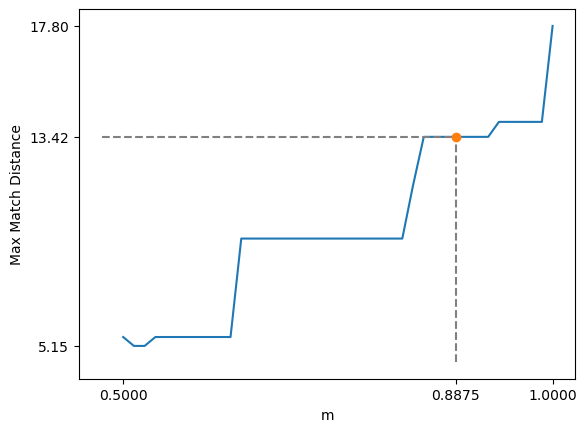

In [49]:
m =0.8875

fig, ax = plt.subplots()
  
x = max_match_pfgw.ms
y = max_match_pfgw.results[:, 10]

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

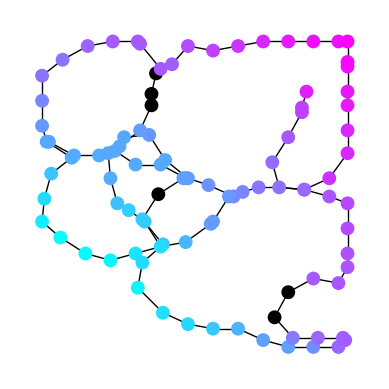

In [46]:

coupling, _ = ot.pfGW(
  src_net, 
  dest_net, 
  m = m,
  M = attributes.attrs[attributes.index_map[1], attributes.index_map[10]],
)

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_size = 80,
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/wind_pfgw_individual.0010.png', dpi=300)

In [15]:
max_match_pw = pipeline.max_match('wind_max_match_pw').build()

max_match_pw.results.shape

> [max_match:wind_max_match_pw] config unchanged, loading


(41, 14)

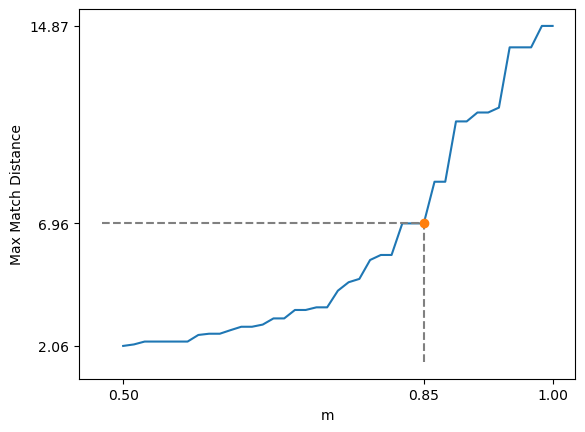

In [50]:
m = 0.85

fig, ax = plt.subplots()
  
x = max_match_pw.ms
y = max_match_pw.results[:, 10]

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

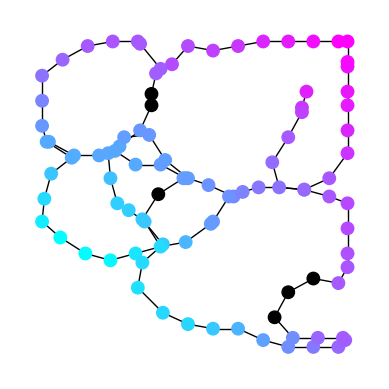

In [51]:
coupling, _ = ot.pWasserstein(
  src_net, 
  dest_net, 
  m = m,
  M = attributes.attrs[attributes.index_map[1], attributes.index_map[10]],
)
src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_size = 80,
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/wind_pw_individual.0010.png', dpi=300)

In [23]:
m_start = 0.75
m_end = 1
num_ms = 30
  
ms = [m_start + i * (m_end - m_start) / num_ms for i in range(num_ms)] + [m_end]

distances = np.zeros(shape = len(ms))

for i, m in enumerate(ms):
  if np.isclose(m, 1):
    _, d = ot.GW(src_net, dest_net)
  else:
    _, d = ot.pGW(
      src_net, 
      dest_net, 
      m = m,
    )
  
  print(f'm = {m}, d = {d}')
  distances[i] = d

m = 0.75, d = 0.03802042775926456
m = 0.7583333333333333, d = 0.039178580898794904
m = 0.7666666666666667, d = 0.04031111696409299
m = 0.775, d = 0.04159937127678168
m = 0.7833333333333333, d = 0.04276546866855864
m = 0.7916666666666666, d = 0.04403756797525732
m = 0.8, d = 0.04533813560040472
m = 0.8083333333333333, d = 0.04576275610008948
m = 0.8166666666666667, d = 0.062458562413252275
m = 0.825, d = 0.06360996312881295
m = 0.8333333333333334, d = 0.05083933183806846
m = 0.8416666666666667, d = 0.05005089339683724
m = 0.85, d = 0.05130165008188278
m = 0.8583333333333334, d = 0.052642184671100406
m = 0.8666666666666667, d = 0.05394531116209906
m = 0.875, d = 0.055314752129787696
m = 0.8833333333333333, d = 0.05674898139837482
m = 0.8916666666666666, d = 0.05838237414178283
m = 0.9, d = 0.06010671330922584
m = 0.9083333333333333, d = 0.061785113888696924
m = 0.9166666666666666, d = 0.06366641643131486
m = 0.925, d = 0.06547967295256647
m = 0.9333333333333333, d = 0.0671900776384434
m 

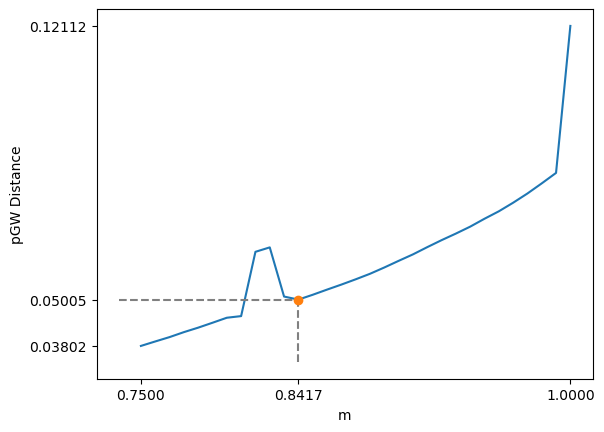

In [36]:
m = 0.8417

fig, ax = plt.subplots()
  
x = np.asarray(ms)
y = distances

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('pGW Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

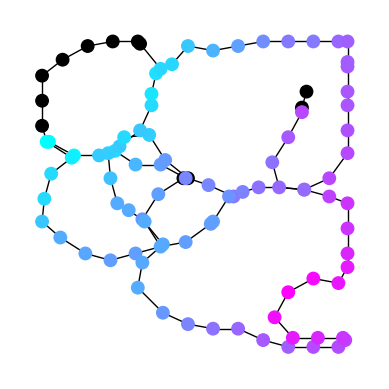

In [52]:
coupling, _ = ot.pGW(
  src_net, 
  dest_net, 
  m = m,
)

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_size = 80,
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/wind_pgw_individual.0010.png', dpi=300)